### Name: Dat Ho

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# import dataset
hotel = pd.read_csv("INNHotelsGroup.csv")
data = hotel.copy()

<IPython.core.display.Javascript object>

#### First 5 rows

In [3]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

#### Last 5 rows

In [4]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


<IPython.core.display.Javascript object>

In [5]:
data.shape

(36275, 19)

<IPython.core.display.Javascript object>

- The dataset contains 19 columns and 36275 rows

#### Check for data types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

- The dataset includes int64, float64, object data types

#### Check for duplication

In [7]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There is no duplication in the dataset

#### Check for missing data

In [8]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

- No missing data

In [9]:
data.Booking_ID.nunique()

36275

<IPython.core.display.Javascript object>

- Booking_ID columns lists all the unique identidier number that will not contribute to the analysis; therefore it will be dropped.

#### Drop the Booking_ID column

In [9]:
data.drop("Booking_ID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
data.shape

(36275, 18)

<IPython.core.display.Javascript object>

In [12]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

In [13]:
data.tail()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis


#### Checking the statistical summary.

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


<IPython.core.display.Javascript object>

- The majority of the guests are couple of two.
- The maximum number of children is 10, which could be an issue.
- On average, guests spent 2 nights during the week.
- An average lead time is 85 days.
- Average price per room is $103 dollars.

#### Define functions for visualization:
- histogram_boxplot displays boxplot and histogram combined.
- labeled_barplot displays barplot with percentage at the top.

In [11]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [16]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Lead time
- lead_time: Number of days between the date of booking and the arrival date

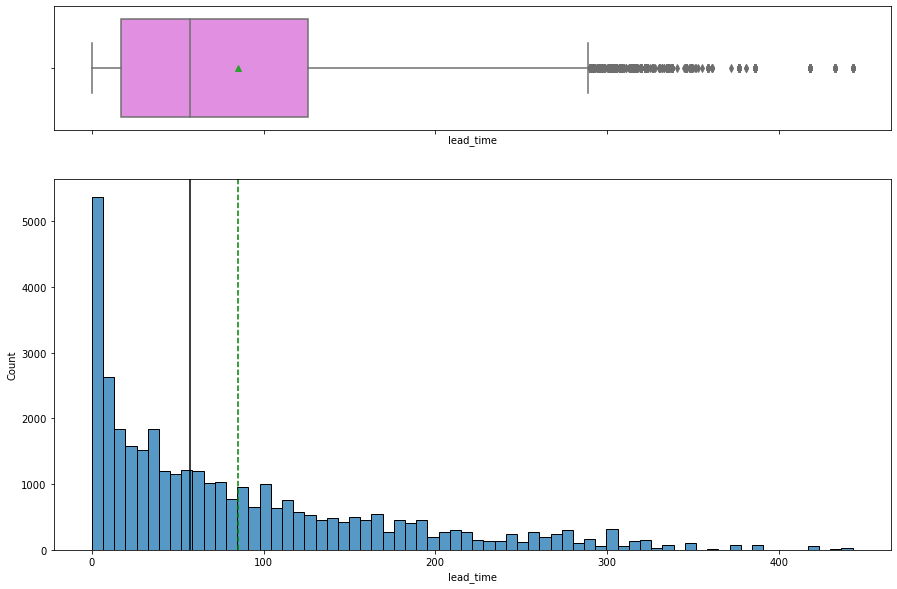

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(data, "lead_time")

In [18]:
data.lead_time.describe()

count   36275.00000
mean       85.23256
std        85.93082
min         0.00000
25%        17.00000
50%        57.00000
75%       126.00000
max       443.00000
Name: lead_time, dtype: float64

<IPython.core.display.Javascript object>

- The average lead time is 85 days.


#### Average price per room
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

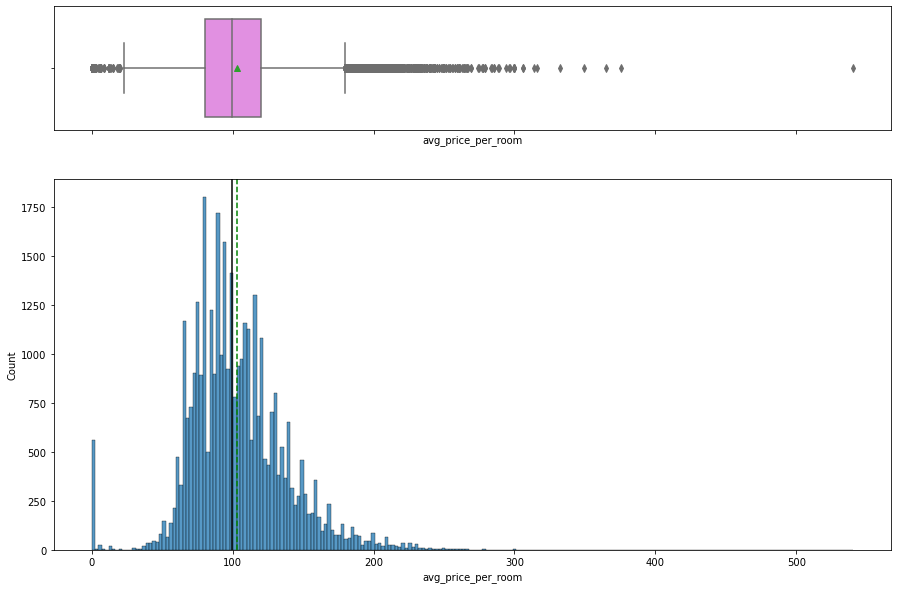

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "avg_price_per_room")

In [20]:
data.avg_price_per_room.describe()

count   36275.00000
mean      103.42354
std        35.08942
min         0.00000
25%        80.30000
50%        99.45000
75%       120.00000
max       540.00000
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

- The minimum price for a room is 0 dollar. Need further analysis.
- The average price is 103 dollars.
- The maxium price is 540 dollars.

#### Some rooms are at 0 dollars (free room), let's take a look to see why

In [21]:
# filter all the avg price per room at 0
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


<IPython.core.display.Javascript object>

#### Check to see which market segment does the free room belong

In [22]:
# identify which market segment does free room belong
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].unique()

array(['Complementary', 'Online'], dtype=object)

<IPython.core.display.Javascript object>

- The free rooms belong in Online and Complemenary market segments

In [23]:
# group the avg price per room equal to 0 in to market segment type and do a value count
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

- In conclusion, the company might give out free room as complementary for guests. Some guest might claim the free room via online.

#### Number of previous booking cancellation
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

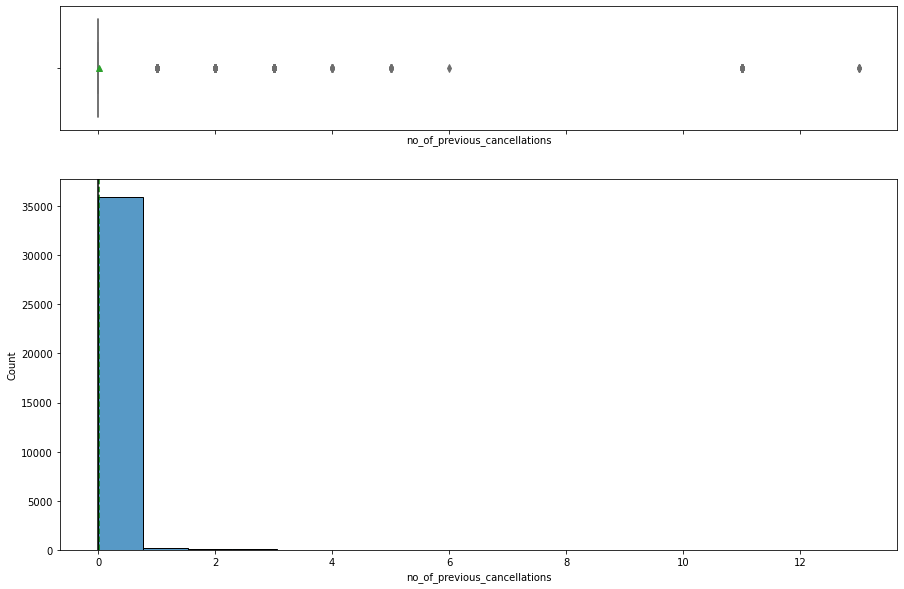

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(data, "no_of_previous_cancellations")

In [25]:
data.no_of_previous_cancellations.describe()

count   36275.00000
mean        0.02335
std         0.36833
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max        13.00000
Name: no_of_previous_cancellations, dtype: float64

<IPython.core.display.Javascript object>

- Most of the data suggests that the customer did not cancel any previous bookings before the current one

#### Number of previous booking not canceled
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

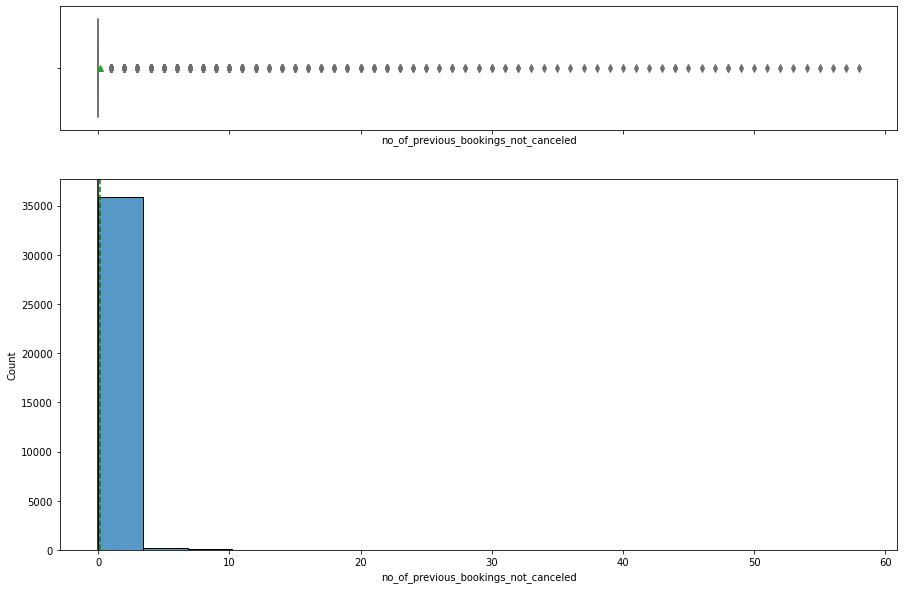

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

In [27]:
data.no_of_previous_bookings_not_canceled.describe()

count   36275.00000
mean        0.15341
std         1.75417
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max        58.00000
Name: no_of_previous_bookings_not_canceled, dtype: float64

<IPython.core.display.Javascript object>

- The preponderance of the data indicates that the customer did not cancel any previous bookings before the current one, with a majority count of zero cancellations.

#### Number of adults
- no_of_adults: Number of adults

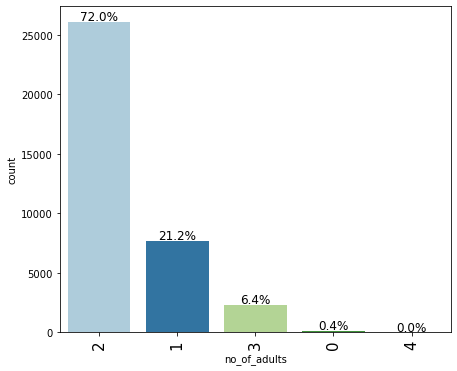

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(data, "no_of_adults", perc=True)

- Most of the guest come as couple of two.(~72%)
- ~21% are single guests.

#### Number of children
- no_of_children: Number of Children

In [29]:
data.no_of_children.value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

<IPython.core.display.Javascript object>

In [30]:
# replace the number of 9 and 10 by 3
data.no_of_children = data.no_of_children.replace([9, 10], 3)
data.no_of_children.value_counts()

0    33577
1     1618
2     1058
3       22
Name: no_of_children, dtype: int64

<IPython.core.display.Javascript object>

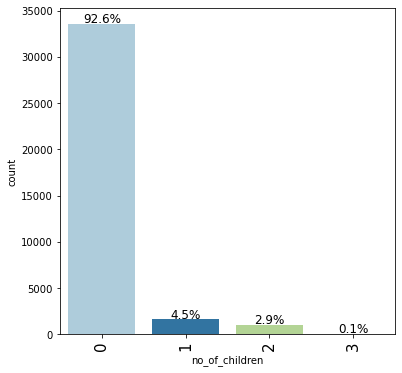

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(data, "no_of_children", perc=True)

- 92% of the guest does not have kid
- 4.5% of the guest have 1 kid.
- 2.9% have 2 kids.

#### Number of week night
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

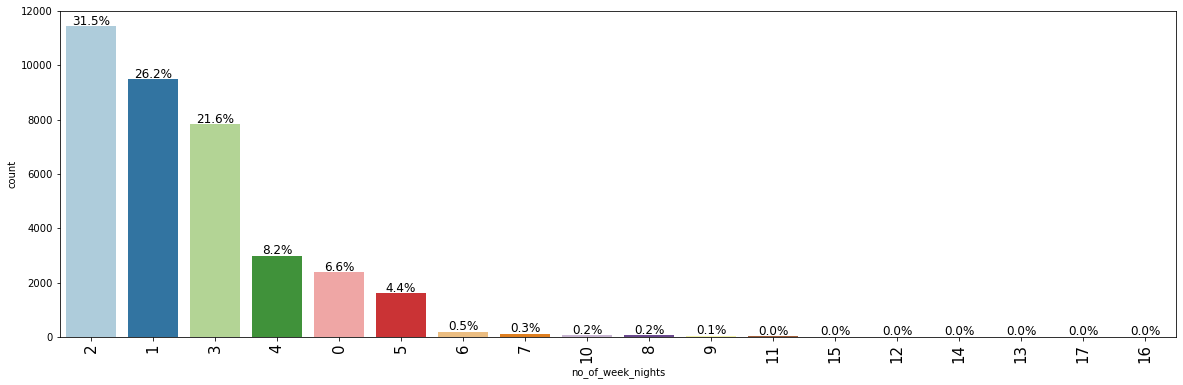

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(data, "no_of_week_nights", perc=True)

- 31.5% of the guest stayed 2 nights during weekdays.
- 26.2% of the guest stayed 1 night during weekdays.
- 21.6% of the guest stayed 3 nights during weekdays.
- 8.2% of the guest stayed 4 nights during weekdays.
- 4.4% of the guest stayed 5 nights durinng weekdays.

#### Number of weekend nights
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

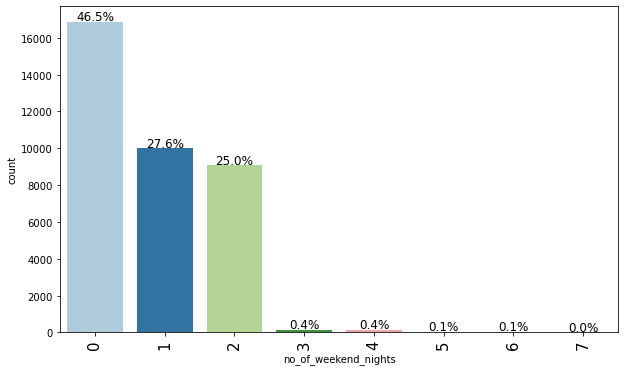

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)

- 27% of the guest stayed 1 night on the weekend.
- 25% of the guest stayed 2 nights on the weekend.

#### Car parking space requirement
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

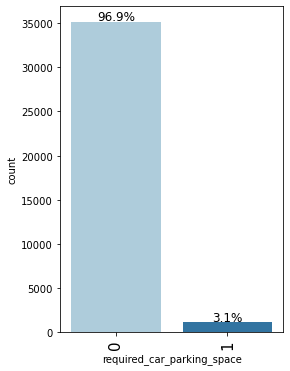

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(data, "required_car_parking_space", perc=True)

- 96.9% of the guest does not require parking space.

#### Meal Plan Type
- type_of_meal_plan: Type of meal plan booked by the customer:
        Not Selected – No meal plan selected
        Meal Plan 1 – Breakfast
        Meal Plan 2 – Half board (breakfast and one other meal)
        Meal Plan 3 – Full board (breakfast, lunch, and dinner)

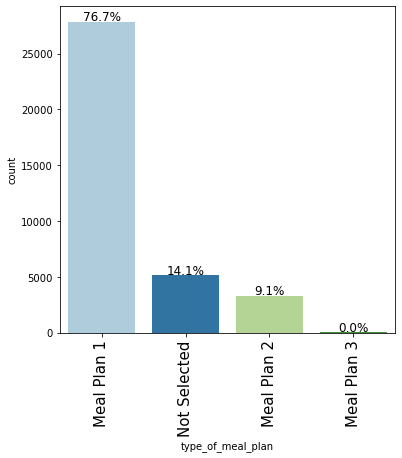

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(data, "type_of_meal_plan", perc=True)

- 76.7% of the guest selected Meal Plan 1.
- 9.1% of the guset selected Meal Plan 2.
- 14.1% of the guest did not select meal plan.

#### Room type reserved
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

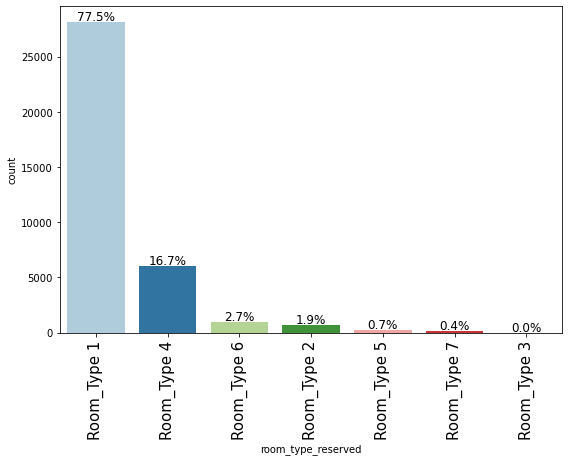

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(data, "room_type_reserved", perc=True)

- 77.5% of the guest reserved room type 1.
- 16.7% of the guest reserved room type 2.
- 2.7% of the guest reserved room type 6.

#### Arrival Month
- arrival_month: Month of arrival date

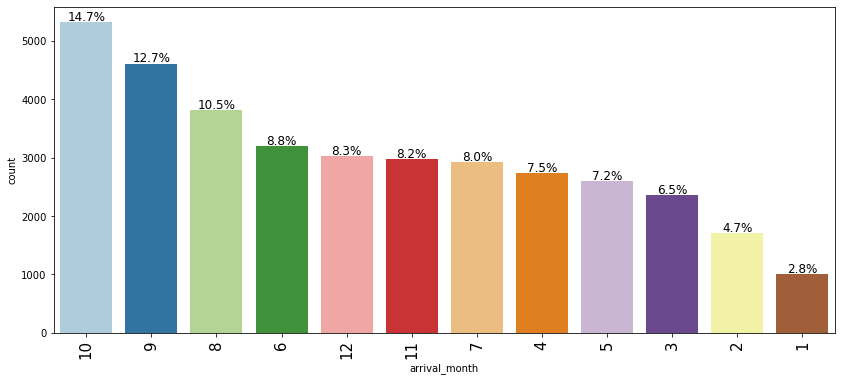

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(data, "arrival_month", perc=True)

- 14.7% of the guest arrived in October.
- 12.7% of the guest arrived in September.
- 10.5% of the guset arrived in August.

#### Arrival Date
- arrival_date: Date of the month

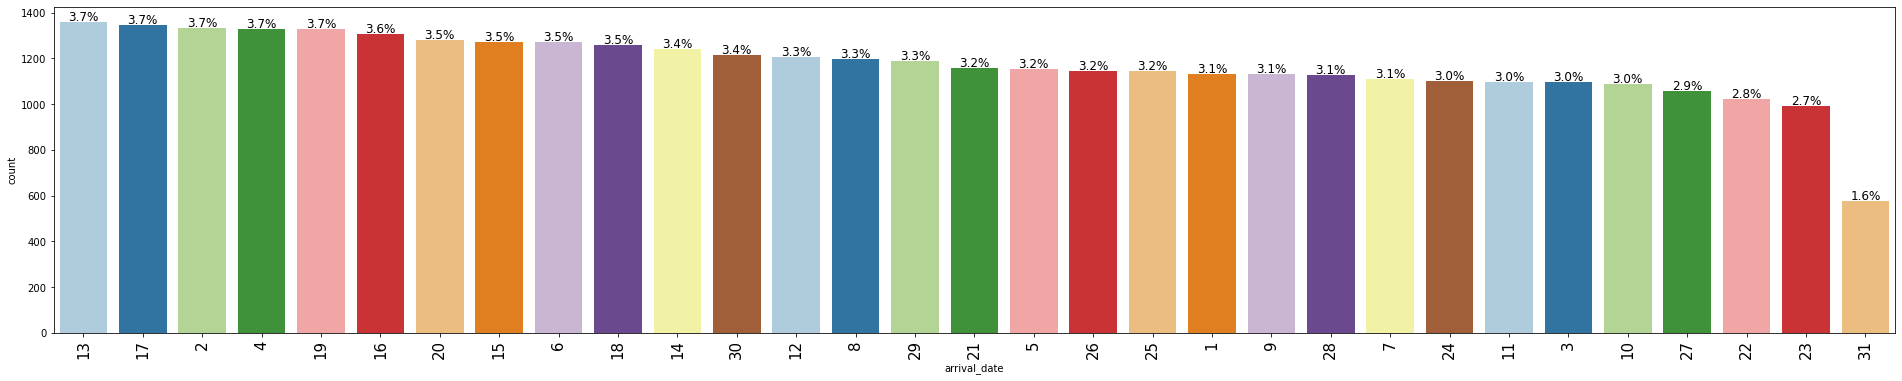

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(data, "arrival_date", perc=True)

#### Arrival Year
- arrival_year: Year of arrival date

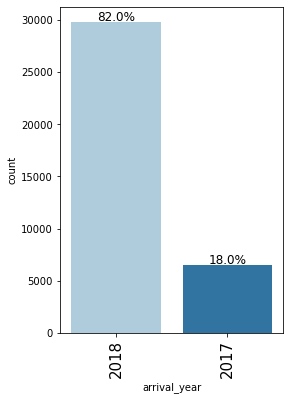

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(data, "arrival_year", perc=True)

#### Market Segment Type
- market_segment_type: Market segment designation.

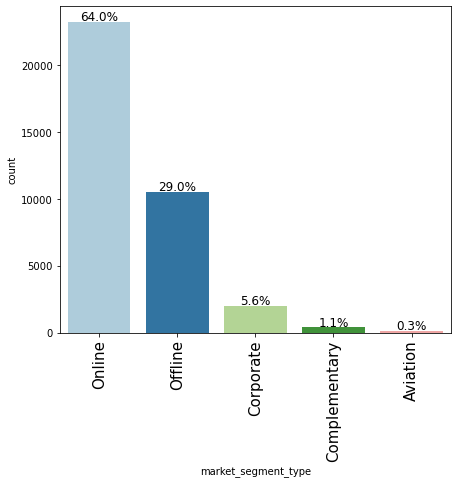

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(data, "market_segment_type", perc=True)

- Online captured 64% of the market.
- Offline captured 29% of the market.
- Corporate captured 5.6% of the market.

#### Number of Special Requests
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

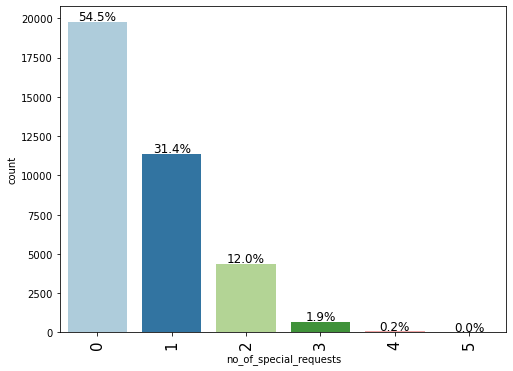

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(data, "no_of_special_requests", perc=True)

- 54.5% of the guest did not have any special request.
- 31.4% of the guest have 1 special request.
- 12% of the guest have 2 special requests.
- 2% of the guest have 3 or more special requests.

#### Booking status
- booking_status: Flag indicating if the booking was canceled or not.
        0 : not canceled
        1 : canceled

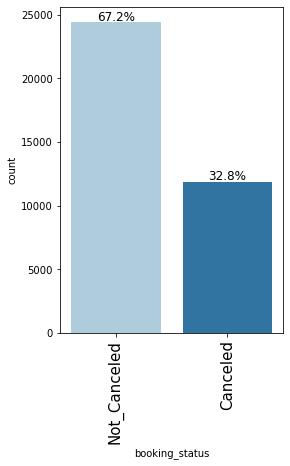

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(data, "booking_status", perc=True)

- 67.2% of the bookings are not canceled.
- 32.8% of the bookings are canceled.

In [12]:
# converted booking_status to binary number
data.booking_status = data.booking_status.apply(lambda x: 1 if x == "Canceled" else 0)
data.booking_status.value_counts(1)

0   0.67236
1   0.32764
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

### Bivariate Analysis


### Correlation

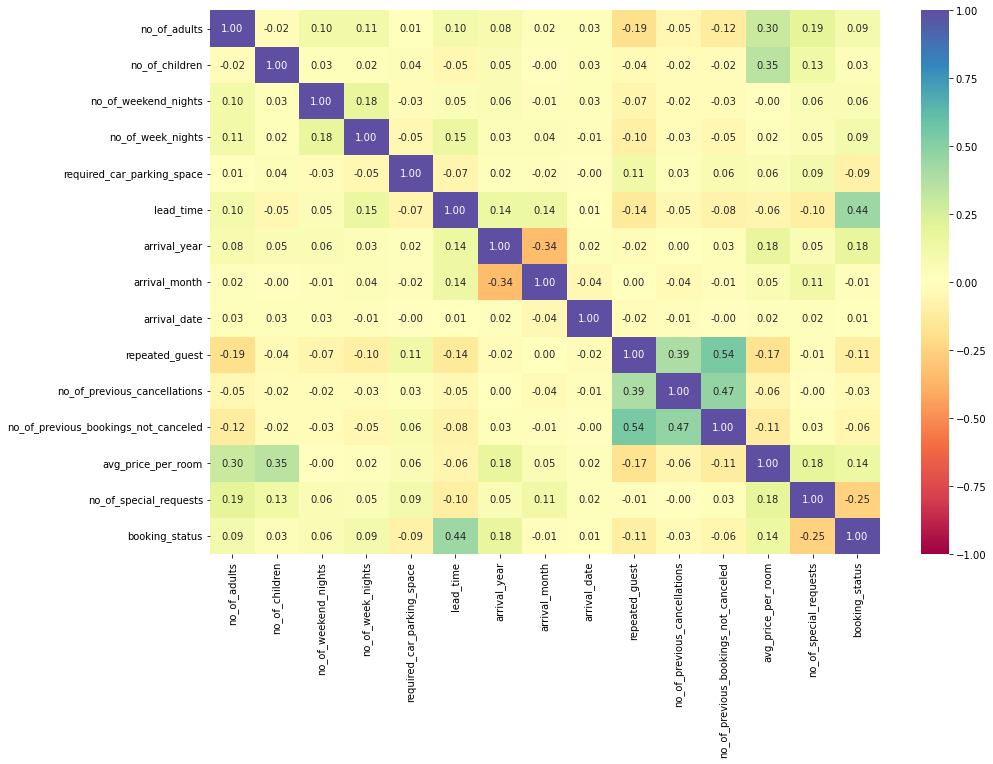

<IPython.core.display.Javascript object>

In [44]:
cols = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 10))
sns.heatmap(data[cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- lead time is 0.44 correlate with booking status.
- the repeated guest has 0.54 correlate with number of previous booking not canceled.

#### Define function for visualization:
- distribution_plot_wrt_target: print the distribution plot
- stacked_barplot: Print the category counts and plot a stacked bar chart

In [45]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [46]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### 1. What are the busiest months in the hotel?

In [47]:
#count all the number of guest in every month
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()
monthly_data = pd.DataFrame({'Month': list(monthly_data.index),'Guests':list(monthly_data.values)})
monthly_data


,Month,Guests
0,1,1014
1,2,1704
2,3,2358
3,4,2736
4,5,2598
5,6,3203
6,7,2920
7,8,3813
8,9,4611
9,10,5317


<IPython.core.display.Javascript object>

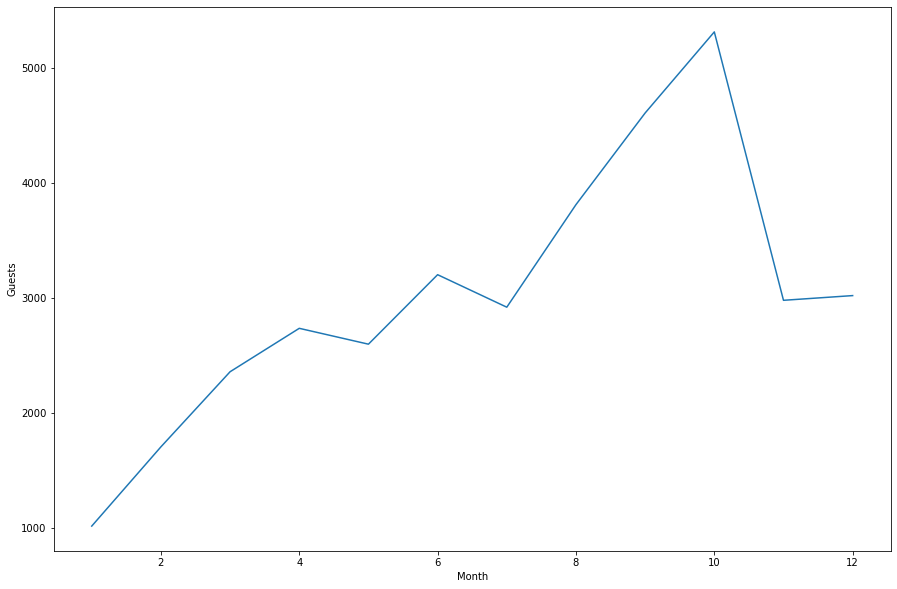

<IPython.core.display.Javascript object>

In [48]:
# plotting the trend over different months
plt.figure(figsize=(15, 10))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

- October is the busiest month.
- The is a spike during July through October.

### 2. Which market segment do most of the guests come from?

In [49]:
data.market_segment_type.value_counts(1)

Online          0.63994
Offline         0.29023
Corporate       0.05560
Complementary   0.01078
Aviation        0.00345
Name: market_segment_type, dtype: float64

<IPython.core.display.Javascript object>

- Most of the guest come from the Online market segment (63%), follows by Offline market segment type (29%)

#### Check to see how many bookings in each market segment was canceled

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


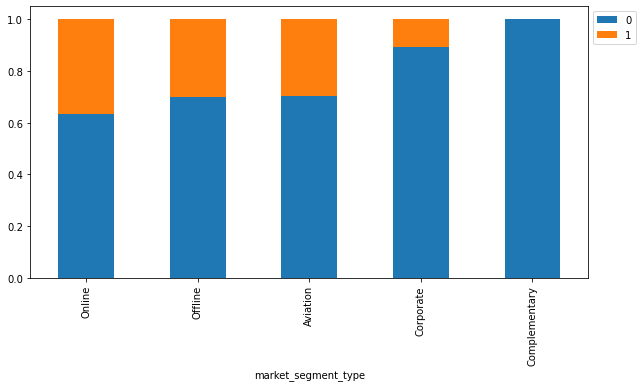

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(data, "market_segment_type", "booking_status")

In [51]:
data.groupby(["market_segment_type"])["booking_status"].value_counts(1)

market_segment_type  booking_status
Aviation             0                0.70400
                     1                0.29600
Complementary        0                1.00000
Corporate            0                0.89093
                     1                0.10907
Offline              0                0.70051
                     1                0.29949
Online               0                0.63492
                     1                0.36508
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

- 36% of the guest from the online market segment canceled.
- 30% of the guest from the offline and aviation market segment canceled.
- 10% from the corporate market segment canceled.

### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

In [52]:
data.groupby(["market_segment_type"])["avg_price_per_room"].describe()

,count,mean,std,min,25%,50%,75%,max
market_segment_type,,,,,,,,
Aviation,125.00000,100.70400,8.53836,79.00000,95.00000,95.00000,110.00000,110.00000
Complementary,391.00000,3.14176,15.51297,0.00000,0.00000,0.00000,0.00000,170.00000
Corporate,2017.00000,82.91174,23.69000,31.00000,65.00000,79.00000,95.00000,220.00000
Offline,10528.00000,91.63268,24.99560,12.00000,75.00000,90.00000,109.00000,540.00000
Online,23214.00000,112.25685,35.22032,0.00000,89.00000,107.10000,131.75000,375.50000


<IPython.core.display.Javascript object>

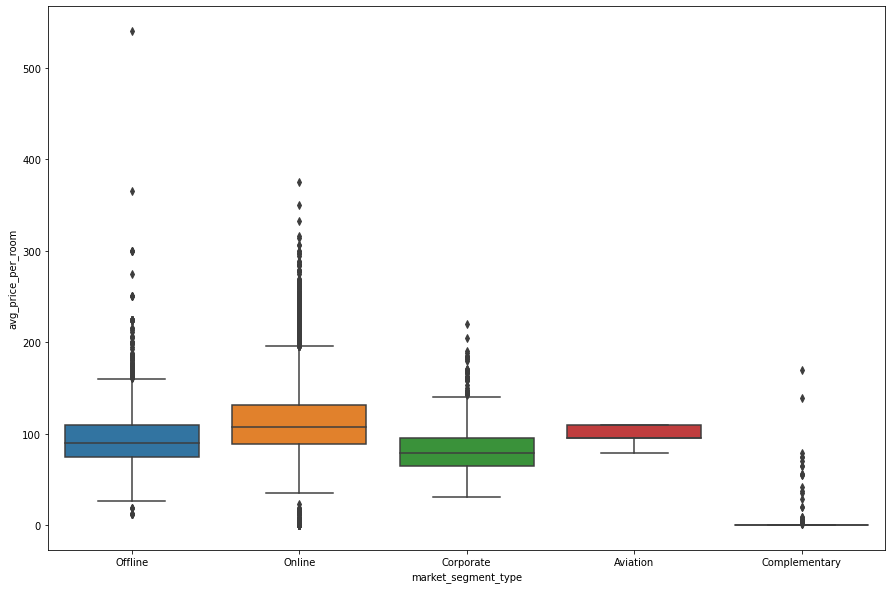

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x="market_segment_type", y="avg_price_per_room")

- Online market segment have higher average per room compared to other segments.
- There are outliers in the data.

#### Check to see if the average price per room impact the booking_status

In [54]:
data[["avg_price_per_room", "booking_status"]].head()

,avg_price_per_room,booking_status
0,65.00000,0
1,106.68000,0
2,60.00000,1
3,100.00000,1
4,94.50000,1


<IPython.core.display.Javascript object>

In [55]:
data.groupby(["booking_status"])["avg_price_per_room"].describe()

,count,mean,std,min,25%,50%,75%,max
booking_status,,,,,,,,
0,24390.00000,99.93141,35.87215,0.00000,77.86000,95.00000,119.10000,375.50000
1,11885.00000,110.58997,32.26439,0.00000,89.27000,108.00000,126.36000,540.00000


<IPython.core.display.Javascript object>

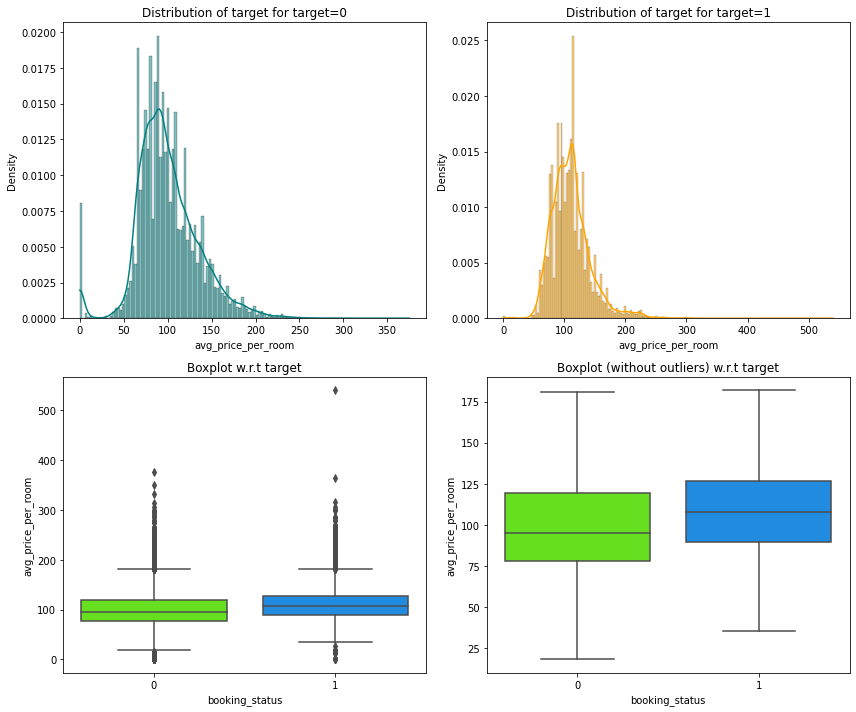

<IPython.core.display.Javascript object>

In [56]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

- The average price per room distribution is right skewed for both canceled and not canceled booking status.
- Guests seems to cancel on higher average price per room. 

#### Check to see if number of special requests would increase the average price per room

In [57]:
data[["avg_price_per_room", "no_of_special_requests"]].head()

,avg_price_per_room,no_of_special_requests
0,65.00000,0
1,106.68000,1
2,60.00000,0
3,100.00000,0
4,94.50000,0


<IPython.core.display.Javascript object>

In [58]:
data.groupby(["no_of_special_requests"])["avg_price_per_room"].describe()

,count,mean,std,min,25%,50%,75%,max
no_of_special_requests,,,,,,,,
0,19777.00000,98.44070,32.98971,0.00000,76.67000,95.00000,115.00000,540.00000
1,11373.00000,105.53395,34.40269,0.00000,84.33000,103.00000,123.80000,365.00000
2,4364.00000,118.05876,39.04902,0.00000,90.41750,114.40000,140.06250,296.00000
3,675.00000,118.29699,40.46031,0.00000,93.80000,116.10000,140.00000,306.00000
4,78.00000,110.07103,58.90582,0.00000,90.37500,120.00000,147.73750,300.00000
5,8.00000,118.12500,61.90964,68.07000,96.30000,96.60000,106.01000,266.67000


<IPython.core.display.Javascript object>

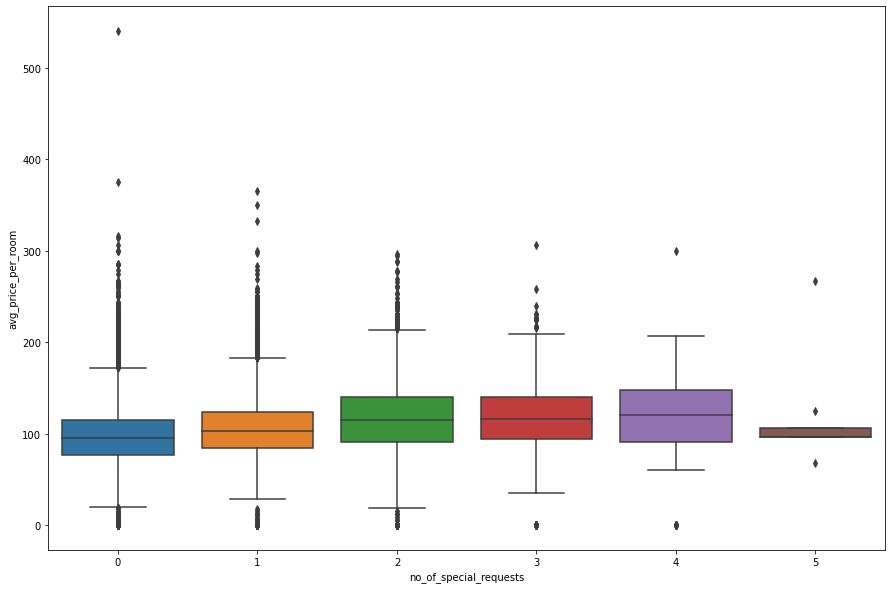

<IPython.core.display.Javascript object>

In [59]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x="no_of_special_requests", y="avg_price_per_room")

- As number of special requests increase, the average price per room also increase.

#### Check to see how vary the average price per room across different months

In [60]:
data.groupby(["arrival_month"])["avg_price_per_room"].describe()

,count,mean,std,min,25%,50%,75%,max
arrival_month,,,,,,,,
1,1014.00000,74.74976,23.19334,0.00000,66.00000,76.59500,85.37500,194.67000
2,1704.00000,80.73364,25.04328,0.00000,67.50000,79.00000,88.00000,230.00000
3,2358.00000,91.88370,33.03628,0.00000,72.62250,85.50000,105.95000,540.00000
4,2736.00000,101.99880,30.22850,0.00000,84.00000,96.30000,115.00000,260.50000
5,2598.00000,113.81068,33.55530,0.00000,95.00000,110.00000,132.60000,296.00000
6,3203.00000,111.96650,28.50186,0.00000,95.00000,115.00000,126.90000,332.57000
7,2920.00000,111.64932,35.75551,0.00000,90.00000,106.00000,131.70000,365.00000
8,3813.00000,113.20398,37.00895,0.00000,90.90000,108.30000,135.90000,316.00000
9,4611.00000,115.90692,37.87422,0.00000,93.50000,112.20000,136.80000,306.00000


<IPython.core.display.Javascript object>

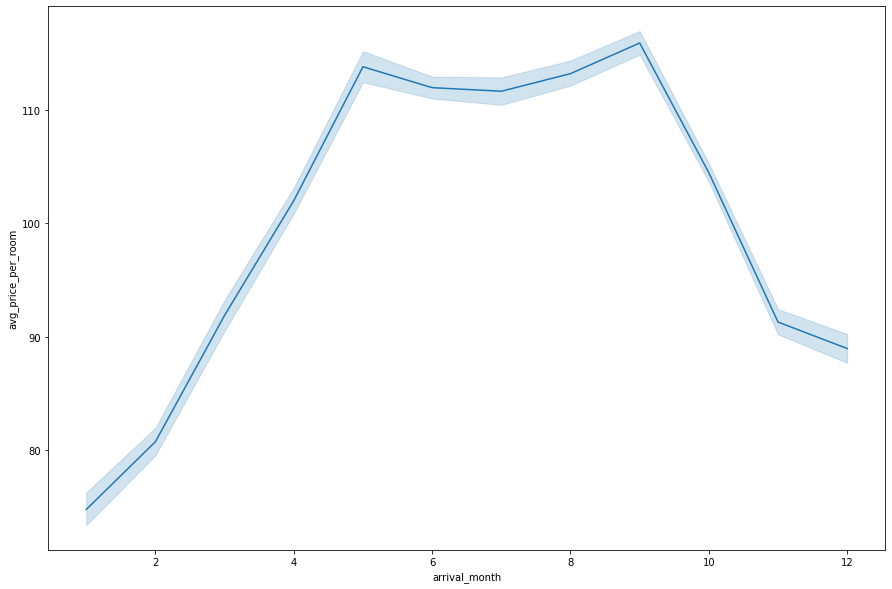

<IPython.core.display.Javascript object>

In [61]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=data, x="arrival_month", y="avg_price_per_room")

- The average price per room is above $ 110 dollars during May through September.

### 4. What percentage of bookings are canceled?

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


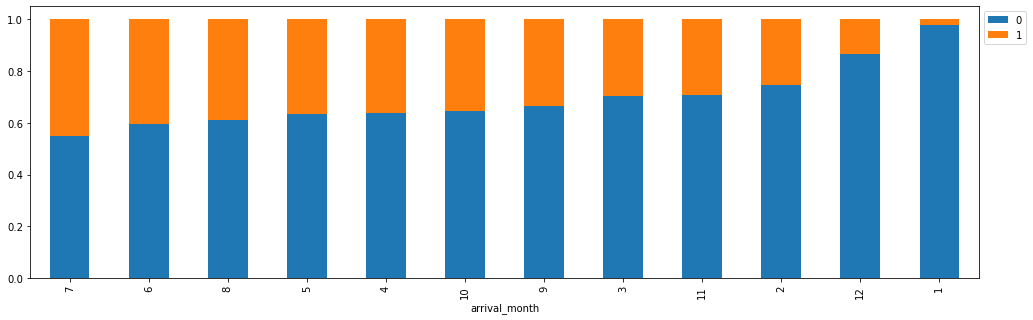

<IPython.core.display.Javascript object>

In [62]:
stacked_barplot(data, "arrival_month", "booking_status")

In [63]:
data.groupby(["arrival_month"])["booking_status"].value_counts(1)

arrival_month  booking_status
1              0                0.97633
               1                0.02367
2              0                0.74765
               1                0.25235
3              0                0.70314
               1                0.29686
4              0                0.63633
               1                0.36367
5              0                0.63510
               1                0.36490
6              0                0.59694
               1                0.40306
7              0                0.55000
               1                0.45000
8              0                0.60976
               1                0.39024
9              0                0.66645
               1                0.33355
10             0                0.64642
               1                0.35358
11             0                0.70638
               1                0.29362
12             0                0.86693
               1                0.13307
Name: book

<IPython.core.display.Javascript object>

* January: 2% canceled
* Feb:    25% canceled
* Mar:    30% canceled
* Apr:    36% canceled
* May:    36% canceled
* June:   40% canceled
* July:   45% canceled
* Aug:    39% canceled
* Sept:   33% canceled
* Oct:    35% canceled
* Nov:    30% canceled
* Dec:    13% canceled

##### Observation:
- Eventhough October was the busiest month but 35% of the bookings were canceled.
- The cancellation rate is ranging from 13%-45% throughout the year.

### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [64]:
data.groupby(["repeated_guest"])["booking_status"].value_counts(1)

repeated_guest  booking_status
0               0                0.66420
                1                0.33580
1               0                0.98280
                1                0.01720
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


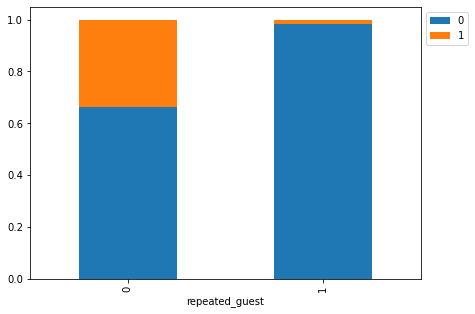

<IPython.core.display.Javascript object>

In [65]:
stacked_barplot(data, "repeated_guest", "booking_status")

#### Observation:
- Repeated guests are rarely canceled their bookings.
- ~34% of non-repeated guests are canceled and only 66% of non-repeated guest seems to keep their bookings.

### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [66]:
data.groupby(["no_of_special_requests"])["booking_status"].value_counts(1)

no_of_special_requests  booking_status
0                       0                0.56793
                        1                0.43207
1                       0                0.76233
                        1                0.23767
2                       0                0.85403
                        1                0.14597
3                       0                1.00000
4                       0                1.00000
5                       0                1.00000
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


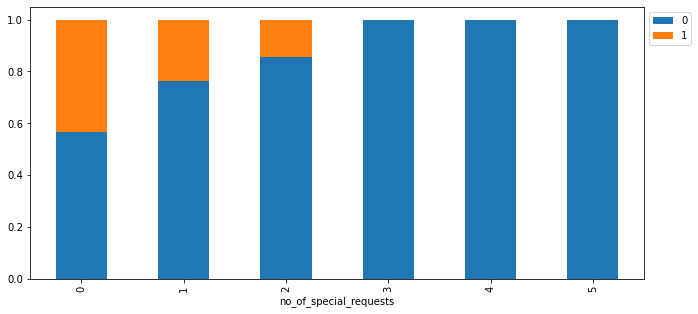

<IPython.core.display.Javascript object>

In [67]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

- Guests with 3 or more special requests tends to keep their bookings.
- 43% of the guest who do not put in any request tend to cancel their bookings.
- 23% of the guest who have 1 special request tend to cancel theri bookings.
- 14% of the guest who have 2 special requests tend to cancel their bookings.

#### Observation:
- The more customization that the guest requested, the less the cancellation rate will be. 

### Check to see if the lead time would affect booking status

In [68]:
data.groupby(["booking_status"])["lead_time"].describe()

,count,mean,std,min,25%,50%,75%,max
booking_status,,,,,,,,
0,24390.00000,58.92722,64.02871,0.00000,10.00000,39.00000,86.00000,386.00000
1,11885.00000,139.21548,98.94773,0.00000,55.00000,122.00000,205.00000,443.00000


<IPython.core.display.Javascript object>

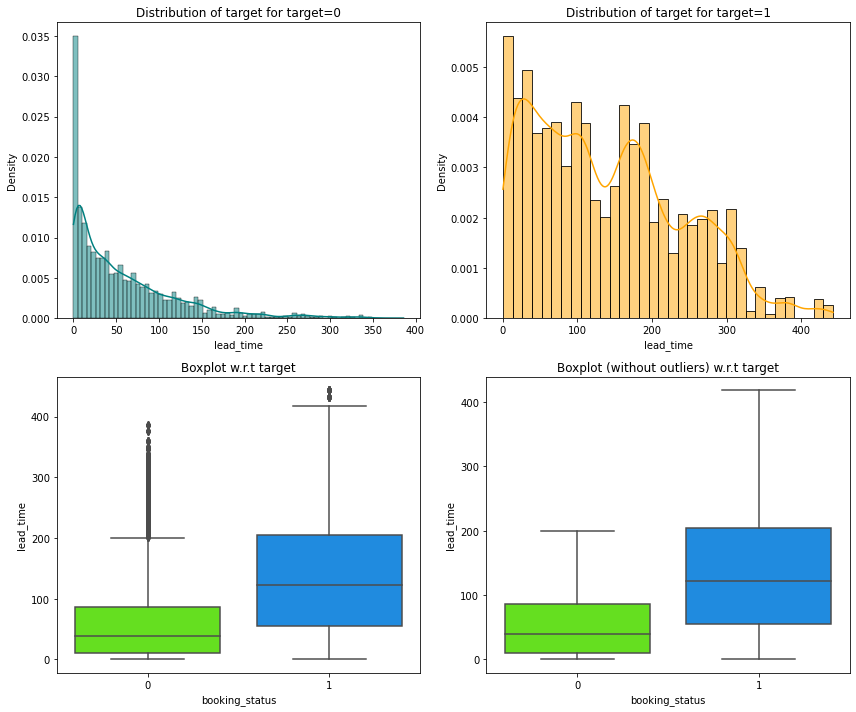

<IPython.core.display.Javascript object>

In [69]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

- Guests are more likely to cancel their booking when the lead time is high. On average, guests tend to cancel their bookings 139 days before the scheduled booking date.
- There are outliers in the data.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Outlier Check

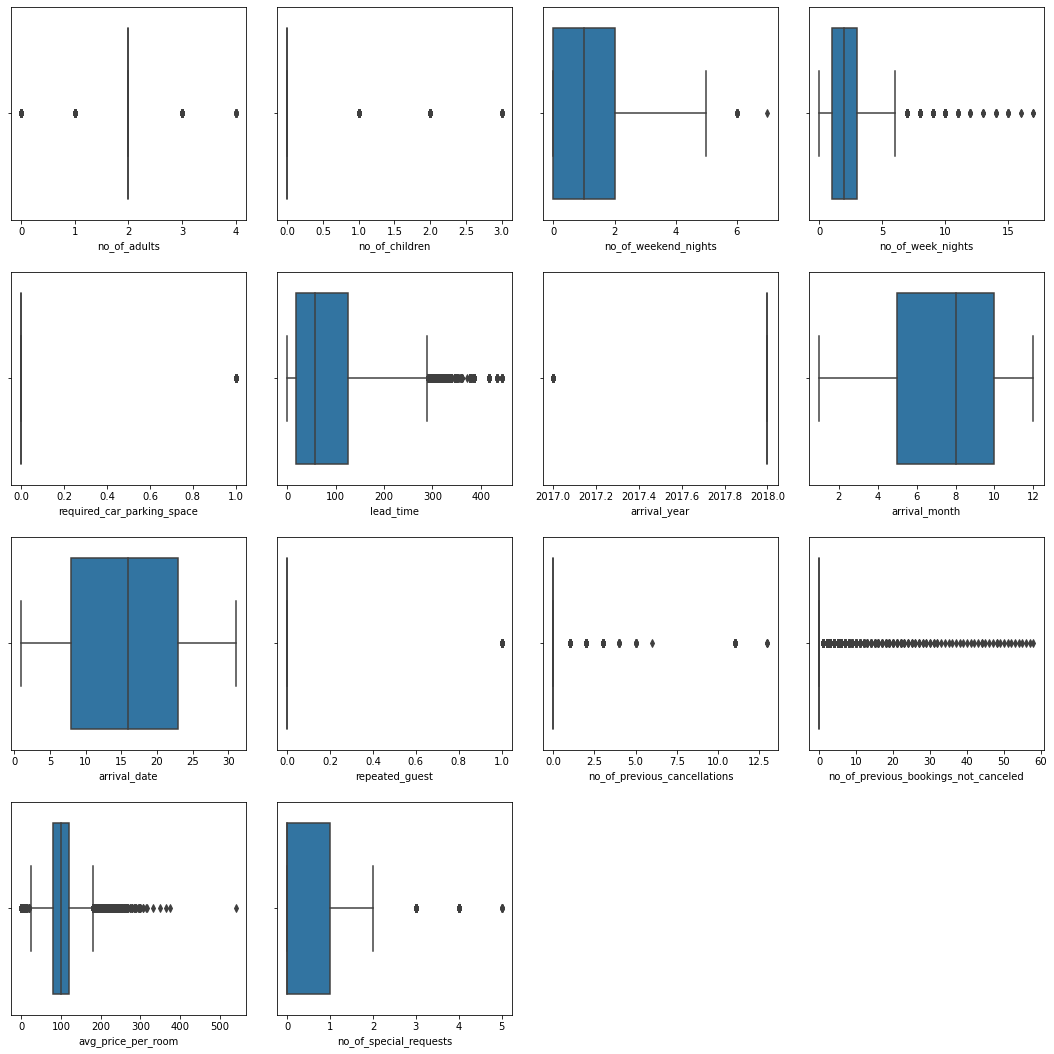

<IPython.core.display.Javascript object>

In [70]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data[variable], whis=1.5)
    plt.tight_layout(pad=2)

plt.show()

#### Observations:
There are outliers in multiple columns, but the outliers will not be removed to avoid losing data.

### Preparing data for modeling

#### Model evaluation criterion

#### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

#### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



#### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [13]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [14]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

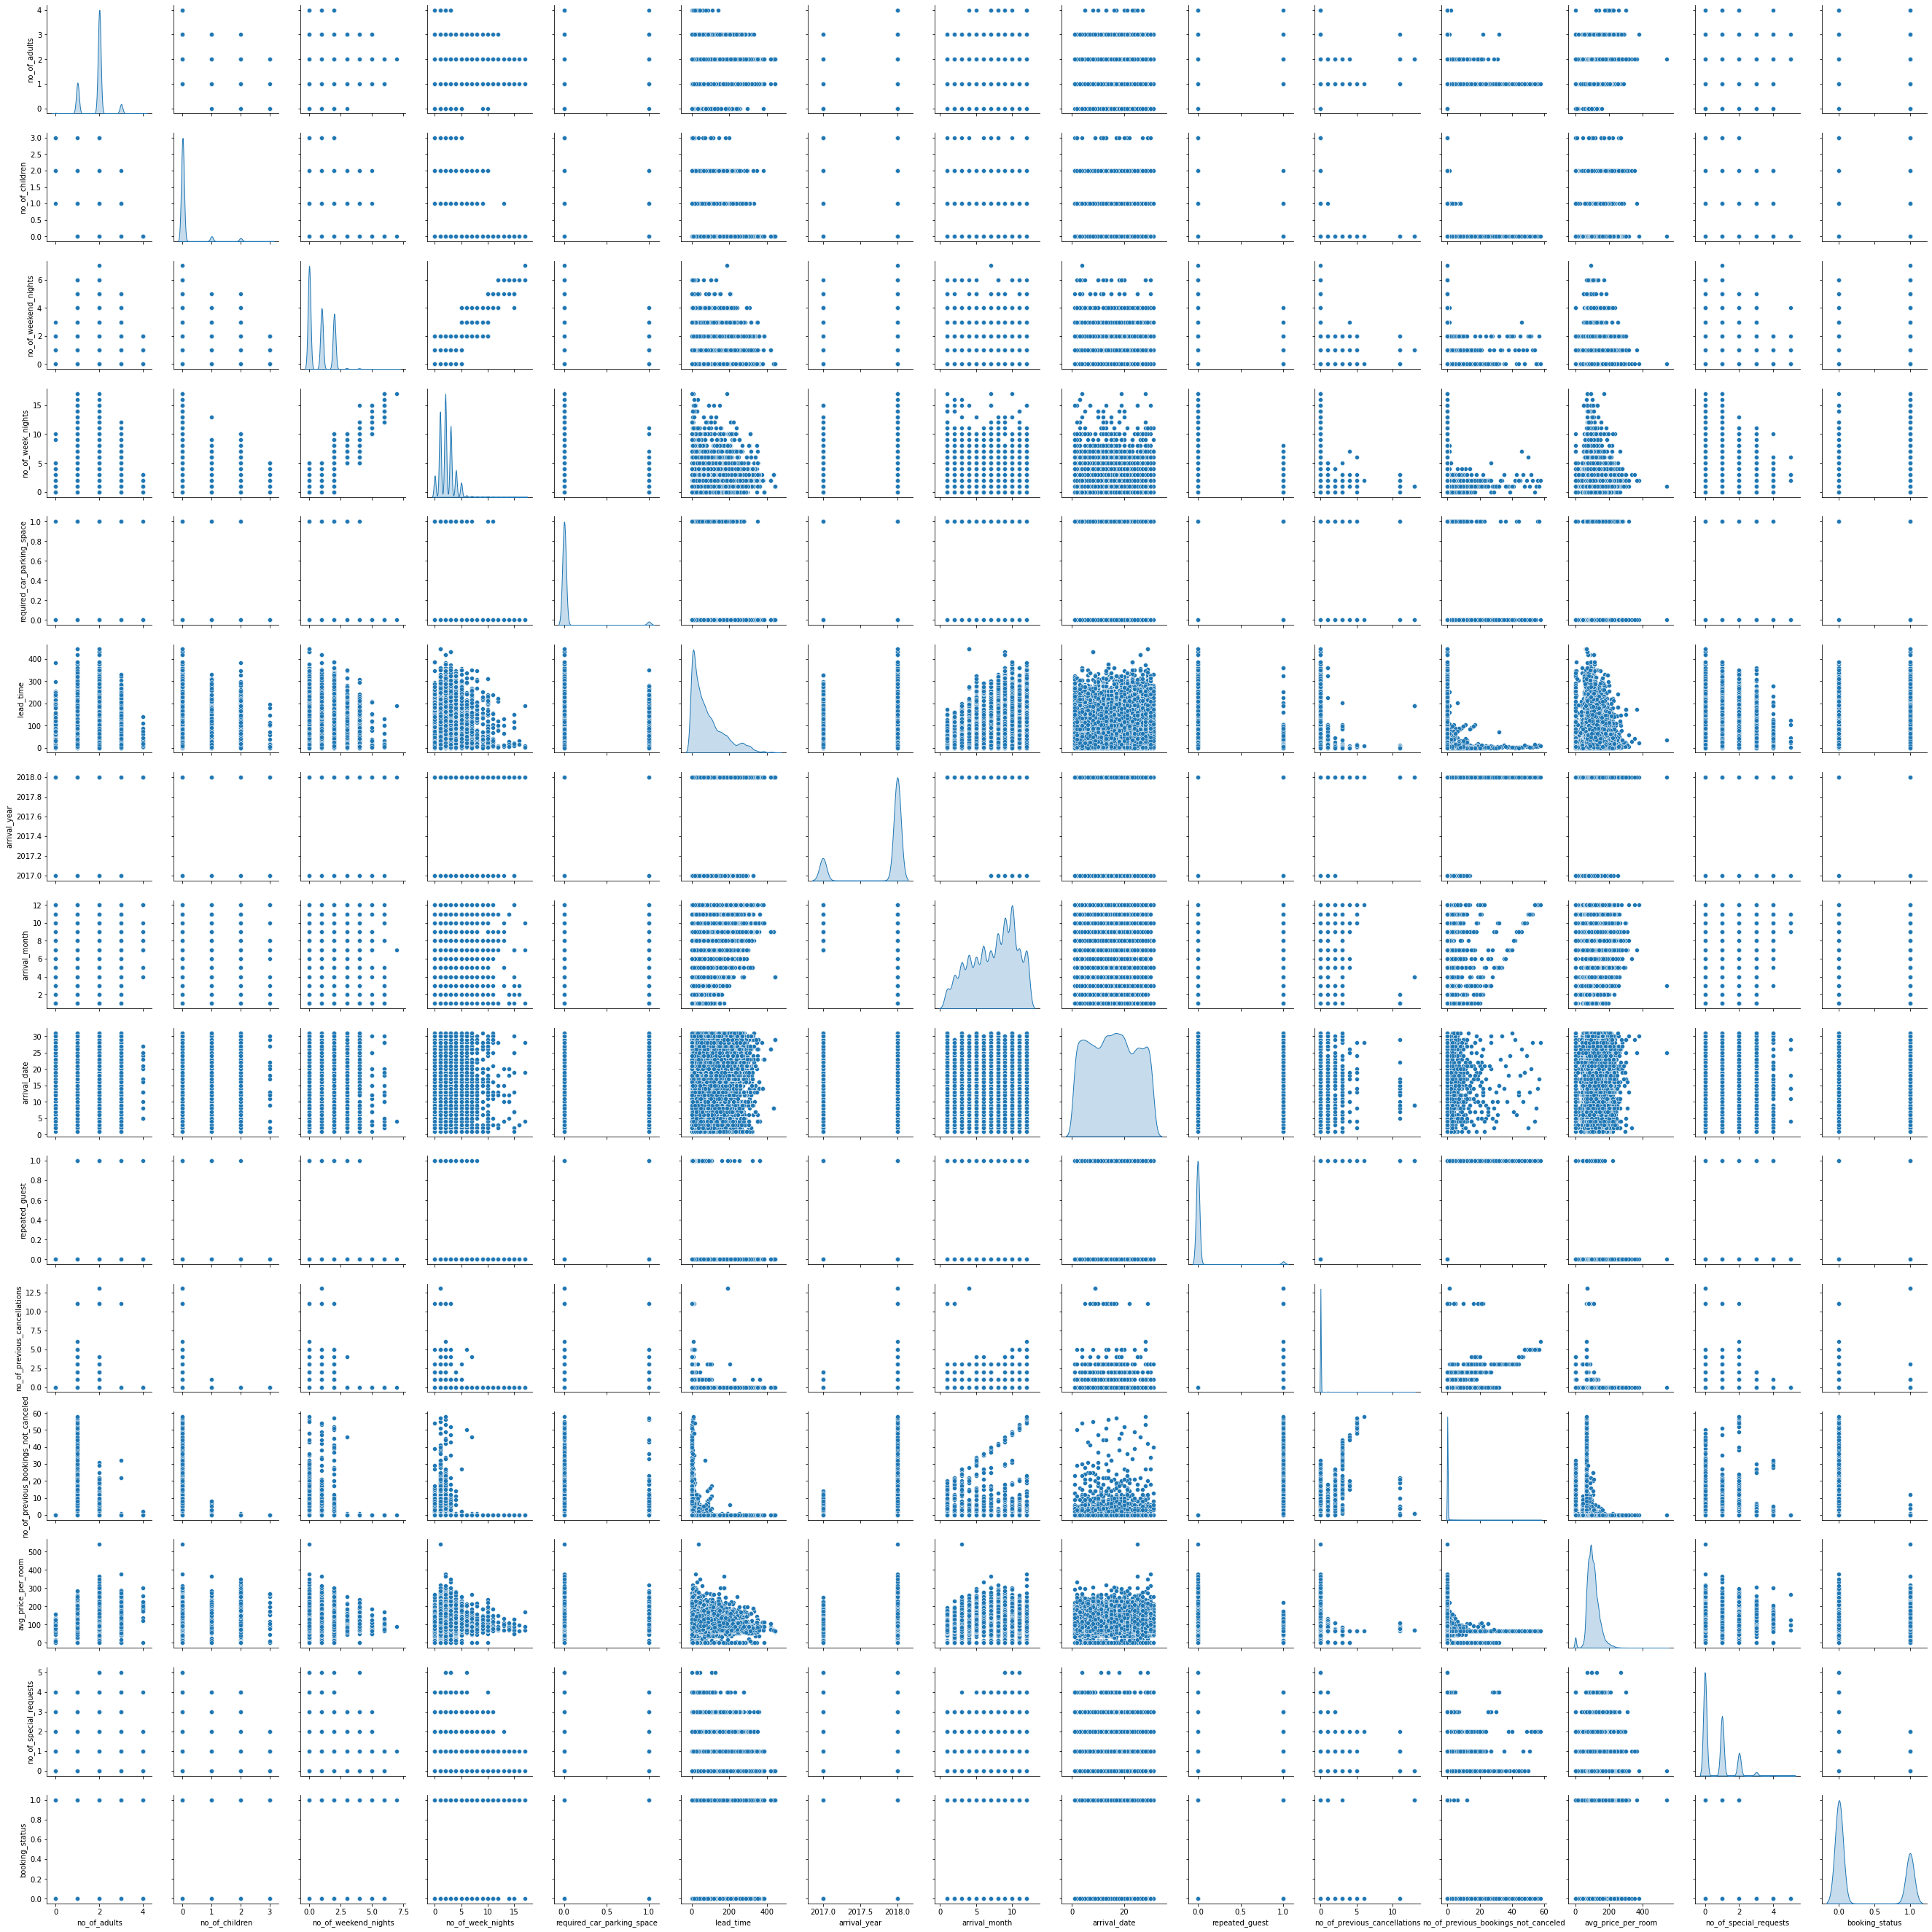

<IPython.core.display.Javascript object>

In [73]:
sns.pairplot(data, diag_kind="kde")

In [15]:
# define X and y
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

print(X.head())
print()
print(Y.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segm

<IPython.core.display.Javascript object>

In [16]:
# Add the intercept to data
X = sm.add_constant(X)
# creating dummy variables
X = pd.get_dummies(X, drop_first=True,)
X.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.00000,2,0,1,2,0,224,2017,10,2,0,0,0,65.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.00000,2,0,2,3,0,5,2018,11,6,0,0,0,106.68000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1.00000,1,0,2,1,0,1,2018,2,28,0,0,0,60.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.00000,2,0,0,2,0,211,2018,5,20,0,0,0,100.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.00000,2,0,1,1,0,48,2018,4,11,0,0,0,94.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [17]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


<IPython.core.display.Javascript object>

## Building a Logistic Regression model

In [18]:
# fitting logistic regression model
logit = sm.Logit(y_train, x_train.astype(float))
lg_model = logit.fit()

print(lg_model.summary())

         Current function value: 0.425036
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 14 Oct 2023   Pseudo R-squ.:                  0.3293
Time:                        09:22:21   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390

<IPython.core.display.Javascript object>

In [19]:
print("Training performance:")
model_performance_classification_statsmodels(lg_model, x_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80604,0.63422,0.73975,0.68293


<IPython.core.display.Javascript object>

- The model seems to perform well on the training set with 80% accuracy. 
- But to make interpretations from the model, first we will have to remove multicollinearity from the data to get reliable coefficients and p-values.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [20]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [80]:
checking_vif(x_train)

,feature,VIF
0,const,39474810.78615
1,no_of_adults,1.35079
2,no_of_children,2.09311
3,no_of_weekend_nights,1.06947
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03992
6,lead_time,1.39491
7,arrival_year,1.43107
8,arrival_month,1.27563
9,arrival_date,1.00680


<IPython.core.display.Javascript object>

- No multicollinearity detected.

#### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [21]:
# initial list of columns
cols = x_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

In [22]:
# redefine the updated x_train and x_test.
x_train1 = x_train[selected_features]
x_test1 = x_test[selected_features]

<IPython.core.display.Javascript object>

#### Perform logistic regression on x_train1

In [23]:
logit1 = sm.Logit(y_train, x_train1.astype(float))
lg_model1 = logit1.fit()

print(lg_model1.summary())

Optimization terminated successfully.
         Current function value: 0.425677
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 14 Oct 2023   Pseudo R-squ.:                  0.3283
Time:                        09:22:37   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615    

<IPython.core.display.Javascript object>

- All high p-values (> 0.05) have been dropped from the model.

In [24]:
print("Training performance:")
model_performance_classification_statsmodels(lg_model1, x_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80541,0.63255,0.73903,0.68166


<IPython.core.display.Javascript object>

- There is no significant change in the model performance as compared to initial model.

####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [25]:
# converting coefficients to odds
odds = np.exp(lg_model1.params)

# adding the odds to a dataframe
pd.DataFrame(odds, x_train1.columns, columns=["odds"]).T



,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
odds,0.00000,1.11475,1.16436,1.11475,1.04264,0.20305,1.01584,1.57324,0.95853,0.06480,1.25716,1.01935,0.22994,1.17992,1.33089,0.70046,0.75383,0.47940,0.38099,0.23903,0.45258,0.16750


<IPython.core.display.Javascript object>

In [86]:
# finding the percentage change
perc_change_odds = (np.exp(lg_model1.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, x_train1.columns, columns=["change_odds%"]).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
change_odds%,-100.00000,11.47969,16.57635,11.47875,4.26206,-79.69675,1.58341,57.22767,-4.14986,-93.52598,25.72288,1.93423,-77.00299,17.98312,33.09559,-29.92003,-24.57872,-52.06881,-61.96015,-76.11050,-54.67705,-83.24783


<IPython.core.display.Javascript object>

### Coefficient interpretations

- an increase in the required_car_parking_space is associated with a significant decrease in the odds of cancellation, with the odds being expected to decrease by 79.69% for every one-unit increase in the required_car_parking_space, assuming all other variables remain constant.

- an increase in the number of adults is associated with a significant increase in the odds of having a cancellation, with the odds being expected to increase by 11.47% for every one-unit increase in the number of adults, assuming all other variables remain constant.

- an increase in the number of children is associated with a significant increase in the odds of having a cancellation, with the odds being expected to increase by 16.57% for every one-unit increase in the number of adults, assuming all other variables remain constant.

- an increase in the number of requests is associated with a significant decrease in the odds of cancellation, with the odds being expected to drop by 77% for every one-unit increase in the number of requests, assuming all other variables remain constant.

- an increase in repeated_guest is associated with a significant decrease in the odds of cancellation, with the odds being expected to drop by 93.5% for every one-unit increase in the repeated_guest, assuming all other variables remain constant.

- an increase in market_segment_type_Offline  is associated with a significant decrease in the odds of cancellation, with the odds being expected to drop by 83.2% for every one-unit increase in the market_segment_type_Offline, assuming all other variables remain constant.

## Model performance evaluation

### Checking model performance on the training set

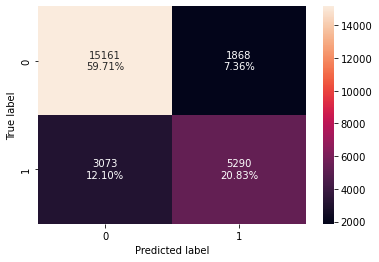

<IPython.core.display.Javascript object>

In [26]:
# create a confusion matrix
confusion_matrix_statsmodels(lg_model1, x_train1, y_train)

In [88]:
print("Training performance:")
default_thres_model_train_perf = model_performance_classification_statsmodels(
    lg_model1, x_train1, y_train
)
default_thres_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80549,0.63279,0.73911,0.68183


<IPython.core.display.Javascript object>

#### ROC-AUC

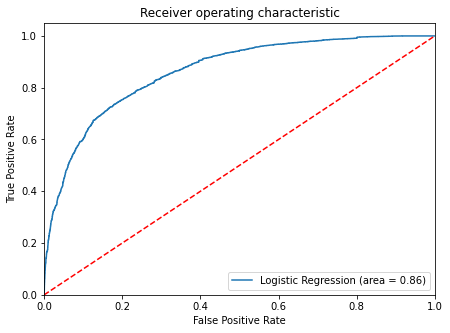

<IPython.core.display.Javascript object>

In [27]:
logit_roc_auc_train = roc_auc_score(y_train, lg_model1.predict(x_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg_model1.predict(x_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- AUC is 0.86, the model is performing well on the training set.
- There is still openings for improvement.

#### Optimal threshold using ROC-AUC curve

In [28]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg_model1.predict(x_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(
    f"The optimal threshold using ROC-AUC curve is {round(optimal_threshold_auc_roc, 2)}"
)

The optimal threshold using ROC-AUC curve is 0.37


<IPython.core.display.Javascript object>

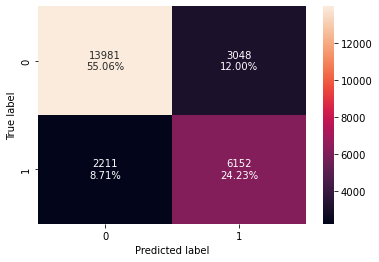

<IPython.core.display.Javascript object>

In [29]:
confusion_matrix_statsmodels(
    lg_model1, x_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [30]:
# checking model performance for this model
lg_model1_train_roc_auc_curve_perf = model_performance_classification_statsmodels(
    lg_model1, x_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
lg_model1_train_roc_auc_curve_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79289,0.73562,0.66870,0.70056


<IPython.core.display.Javascript object>

#### Optimal threshold using Precision-Recall curve

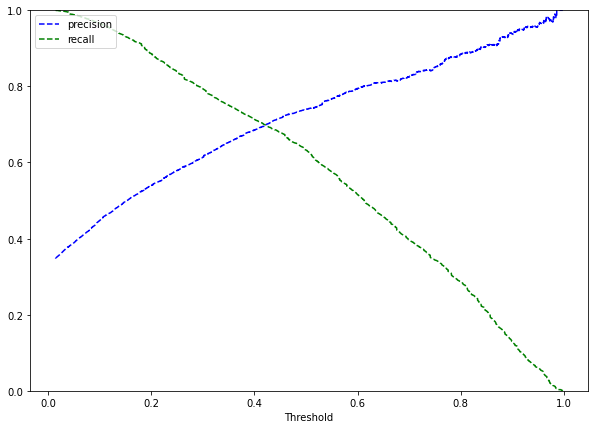

<IPython.core.display.Javascript object>

In [31]:
y_scores = lg_model1.predict(x_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [51]:
print(prec.shape[0],rec.shape[0],tre.shape[0])

17454 17454 17453


<IPython.core.display.Javascript object>

In [52]:
#data = {"Precision": list(prec),
        'Recall': list(rec)}

#pre_df = pd.DataFrame(data)
#pre_df.head()


,Precision,Recall
0,0.34875,1.00000
1,0.34872,0.99988
2,0.34874,0.99988
3,0.34875,0.99988
4,0.34877,0.99988


<IPython.core.display.Javascript object>

In [53]:
#pre_df['Diff']=abs(pre_df.Precision - pre_df.Recall)

<IPython.core.display.Javascript object>

In [54]:
#pre_df.head()

,Precision,Recall,Diff
0,0.34875,1.00000,0.65125
1,0.34872,0.99988,0.65116
2,0.34874,0.99988,0.65114
3,0.34875,0.99988,0.65113
4,0.34877,0.99988,0.65111


<IPython.core.display.Javascript object>

At the threshold of 0.42, we get balanced recall and precision.

In [94]:
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

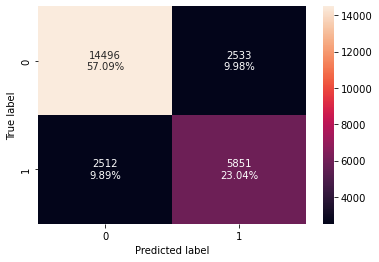

<IPython.core.display.Javascript object>

In [95]:
confusion_matrix_statsmodels(
    lg_model1, x_train1, y_train, threshold=optimal_threshold_curve
)

In [96]:
# checking model performance for this model
lg_model1_train_recall_prec_curve_perf = model_performance_classification_statsmodels(
    lg_model1, x_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
lg_model1_train_recall_prec_curve_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80132,0.69963,0.69788,0.69875


<IPython.core.display.Javascript object>

### Checking model performance on the testing set

#### Default optimal threshold

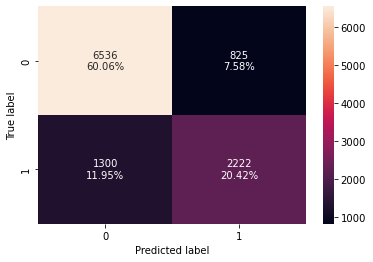

<IPython.core.display.Javascript object>

In [97]:
# creating confusion matrix
confusion_matrix_statsmodels(lg_model1, x_test1, y_test)

In [98]:
print("Testing performance:")
default_thres_model_test_perf = model_performance_classification_statsmodels(
    lg_model1, x_test1, y_test
)
default_thres_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.80474,0.63089,0.72924,0.67651


<IPython.core.display.Javascript object>

#### ROC-AUC

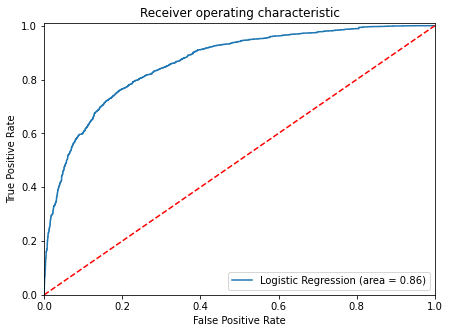

<IPython.core.display.Javascript object>

In [99]:
logit_roc_auc_train = roc_auc_score(y_test, lg_model1.predict(x_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg_model1.predict(x_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Using the ROC-AUC threshold 0.37

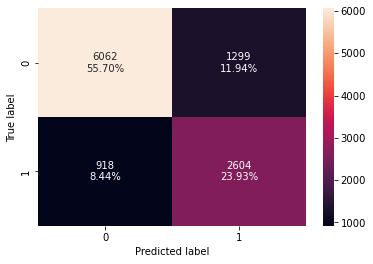

<IPython.core.display.Javascript object>

In [100]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg_model1, x_test1, y_test, threshold=optimal_threshold_auc_roc
)

In [101]:
# checking model performance for this model
lg_model1_test_roc_auc_curve_perf = model_performance_classification_statsmodels(
    lg_model1, x_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Testing performance:")
lg_model1_test_roc_auc_curve_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.79629,0.73935,0.66718,0.70141


<IPython.core.display.Javascript object>

#### Using Recall-Precision threshold 0.42

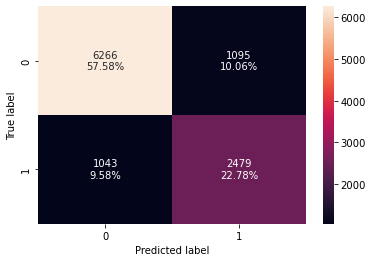

<IPython.core.display.Javascript object>

In [102]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg_model1, x_test1, y_test, threshold=optimal_threshold_curve
)

In [103]:
# checking model performance for this model
lg_model1_test_recall_prec_curve_perf = model_performance_classification_statsmodels(
    lg_model1, x_test1, y_test, threshold=optimal_threshold_curve
)
print("Testing performance:")
lg_model1_test_recall_prec_curve_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.80355,0.70386,0.69362,0.69870


<IPython.core.display.Javascript object>

## Final Model Summary

In [104]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        default_thres_model_train_perf.T,
        lg_model1_train_roc_auc_curve_perf.T,
        lg_model1_train_recall_prec_curve_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80549,0.79289,0.80132
Recall,0.63279,0.73562,0.69963
Precision,0.73911,0.66870,0.69788
F1,0.68183,0.70056,0.69875


<IPython.core.display.Javascript object>

In [105]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        default_thres_model_test_perf.T,
        lg_model1_test_roc_auc_curve_perf.T,
        lg_model1_test_recall_prec_curve_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80474,0.79629,0.80355
Recall,0.63089,0.73935,0.70386
Precision,0.72924,0.66718,0.69362
F1,0.67651,0.70141,0.69870


<IPython.core.display.Javascript object>

- Both training and testing set perform similarly.
- Our objective is to achieve the highest F1 score, and as such, the logistic regression model with an ROC_AUC threshold of 0.37 is the top-performing model, boasting the highest F1 score at 70%. Additionally, this model demonstrates the highest recall, signifying a 73% accuracy in predicting cancellations.

## Building a Decision Tree model

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [55]:
data.shape

AttributeError: 'dict' object has no attribute 'shape'

<IPython.core.display.Javascript object>

In [107]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [108]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [109]:
X = data.drop("booking_status", axis=1)
Y = data.pop("booking_status")

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [110]:
DTree_model = DecisionTreeClassifier(random_state=1)
DTree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

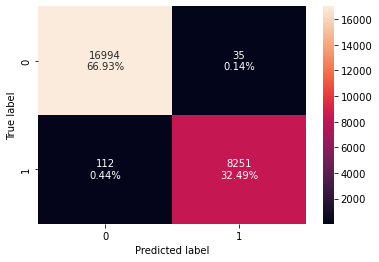

<IPython.core.display.Javascript object>

In [111]:
confusion_matrix_sklearn(DTree_model, X_train, y_train)

In [112]:
DTree_train_perf = model_performance_classification_sklearn(
    DTree_model, X_train, y_train
)
print("Training Performance")
DTree_train_perf

Training Performance


,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


<IPython.core.display.Javascript object>

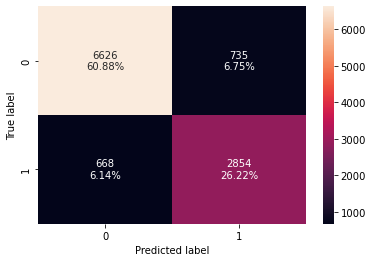

<IPython.core.display.Javascript object>

In [113]:
confusion_matrix_sklearn(DTree_model, X_test, y_test)

In [114]:
DTree_test_perf = model_performance_classification_sklearn(DTree_model, X_test, y_test)

print("Testing performance")
DTree_test_perf

Testing performance


,Accuracy,Recall,Precision,F1
0,0.87108,0.81034,0.79521,0.80270


<IPython.core.display.Javascript object>

- The decision tree model on the training set has a very high accuracy of 99% comparing to 87% on the testing set, it could be overfitting.
- The testing set does not perform well on False Negatives and False Positives.

#### Check the important features.

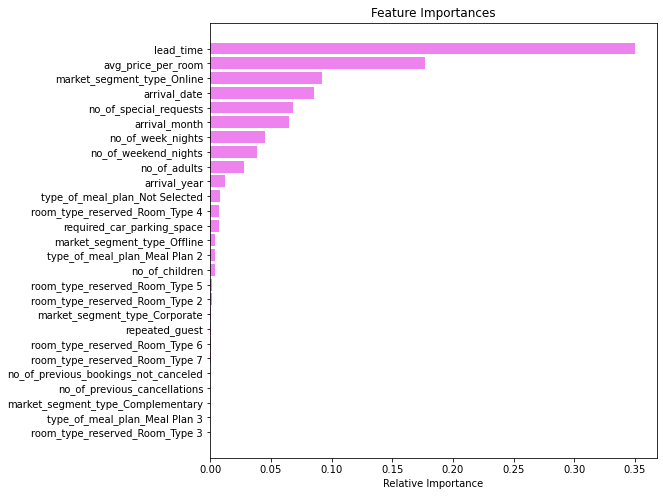

<IPython.core.display.Javascript object>

In [115]:
feature_names = list(X_train.columns)
importances = DTree_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Do we need to prune the tree?

- Prune the tree to reduce overfitting

#### Pre-pruning

In [116]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

<IPython.core.display.Javascript object>

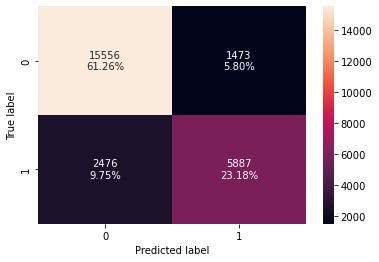

<IPython.core.display.Javascript object>

In [117]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [118]:
DTree_train_preprun_perf = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
DTree_train_preprun_perf

,Accuracy,Recall,Precision,F1
0,0.84448,0.70393,0.79986,0.74884


<IPython.core.display.Javascript object>

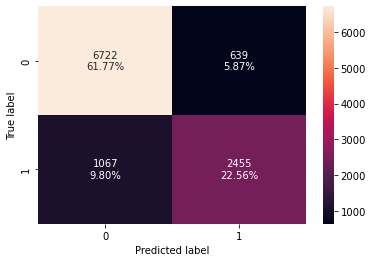

<IPython.core.display.Javascript object>

In [119]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [120]:
DTree_test_preprun_perf = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
DTree_test_preprun_perf

,Accuracy,Recall,Precision,F1
0,0.84324,0.69705,0.79347,0.74214


<IPython.core.display.Javascript object>

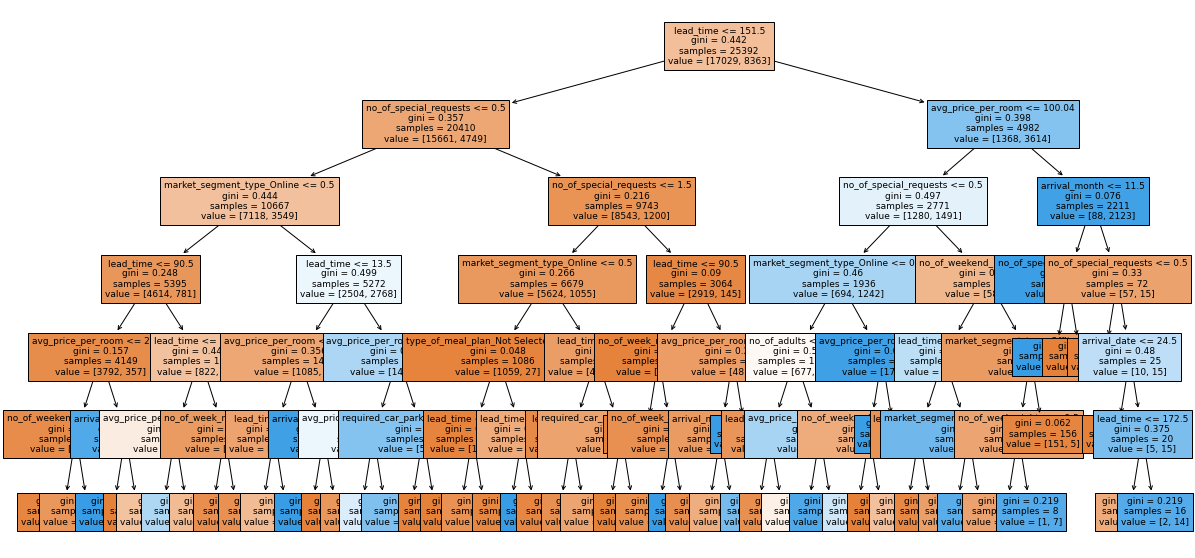

<IPython.core.display.Javascript object>

In [121]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [122]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- weights: [2329.00, 87.00] class: 0
|   |   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |   |--- weights: [1461.00, 253.00] class: 0
|   |   |   |   |--- avg_price_per_room >  201.50
|   |   |   |   |   |--- arrival_month <= 10.50
|   |   |   |   |   |   |--- weights: [0.00, 17.00] class: 1
|   |   |   |   |   |--- arrival_month >  10.50
|   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [288.00, 150.00] class: 0
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [111.00, 188

<IPython.core.display.Javascript object>

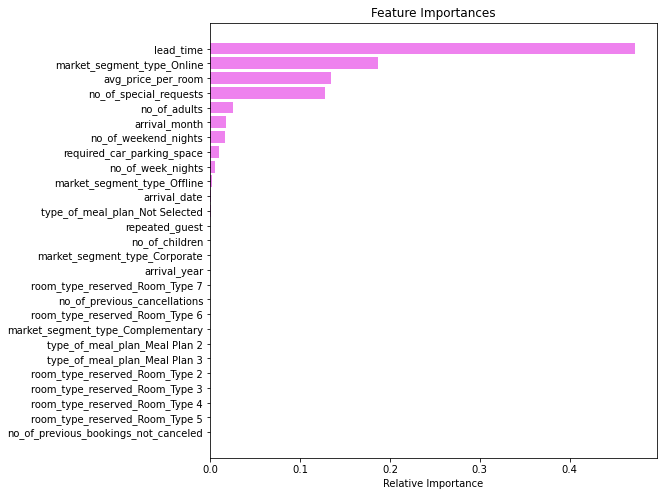

<IPython.core.display.Javascript object>

In [123]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- lead time is top important feature, follows by Online market segment, then average price per room, number of special requests, number of adults, arrival month,etc.

#### Cost complexity pruning
The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [124]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [125]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1899,0.00890,0.32806
1900,0.00980,0.33786
1901,0.01272,0.35058
1902,0.03412,0.41882


<IPython.core.display.Javascript object>

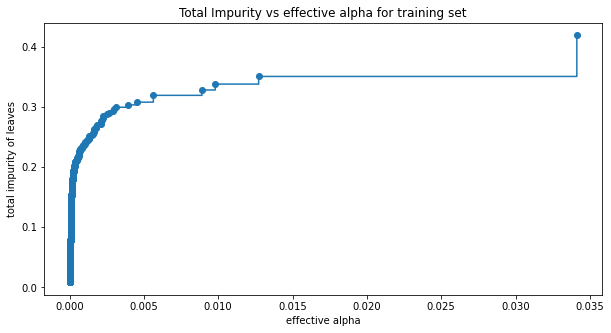

<IPython.core.display.Javascript object>

In [126]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [127]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


<IPython.core.display.Javascript object>

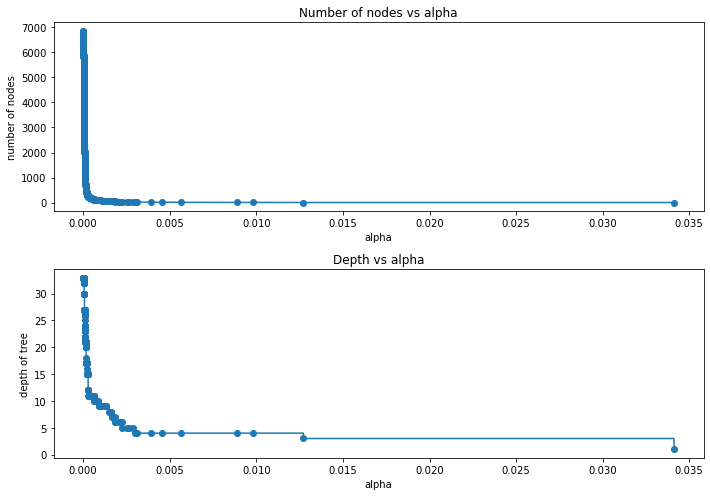

<IPython.core.display.Javascript object>

In [128]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [129]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

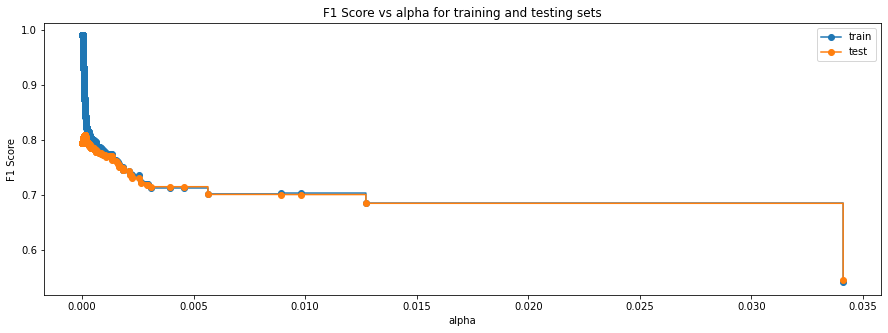

<IPython.core.display.Javascript object>

In [130]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [131]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


<IPython.core.display.Javascript object>

#### Checking performance on training set

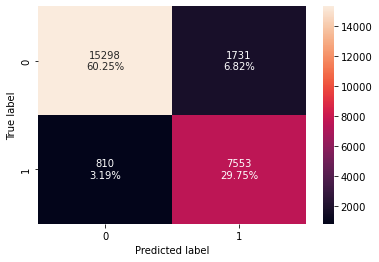

<IPython.core.display.Javascript object>

In [132]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [133]:
DTree_train_postprun_perf = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
DTree_train_postprun_perf

,Accuracy,Recall,Precision,F1
0,0.89993,0.90314,0.81355,0.85601


<IPython.core.display.Javascript object>

#### Checking performance on testing set


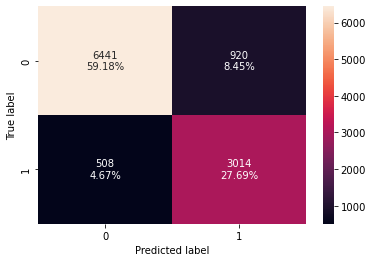

<IPython.core.display.Javascript object>

In [134]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [135]:
DTree_test_postprun_perf = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
DTree_test_postprun_perf

,Accuracy,Recall,Precision,F1
0,0.86879,0.85576,0.76614,0.80848


<IPython.core.display.Javascript object>

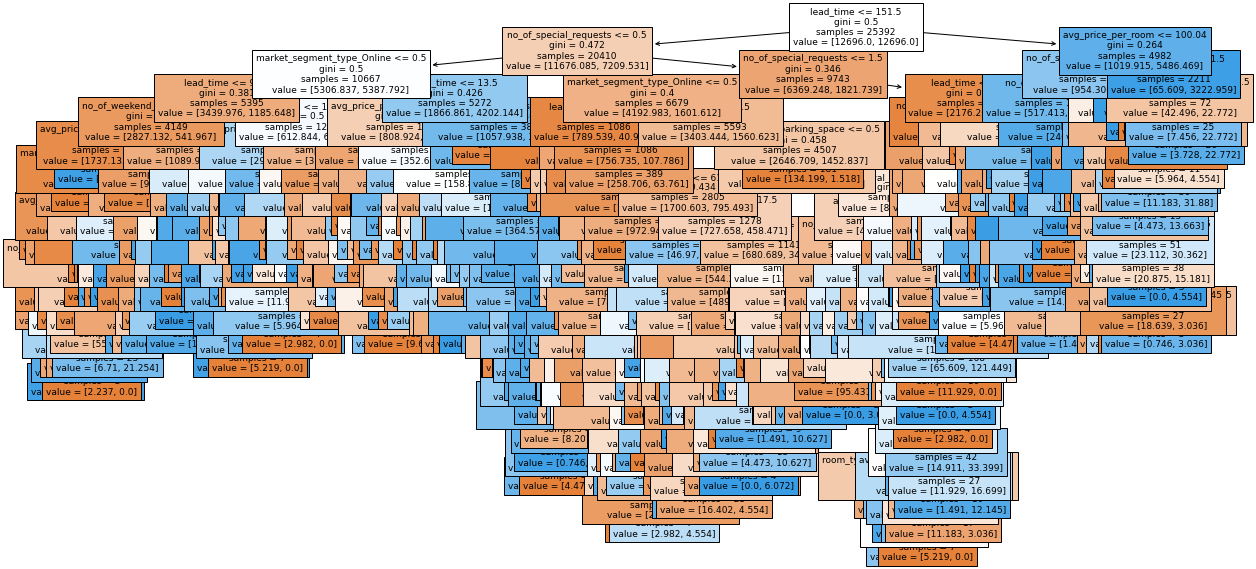

<IPython.core.display.Javascript object>

In [136]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [137]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

<IPython.core.display.Javascript object>

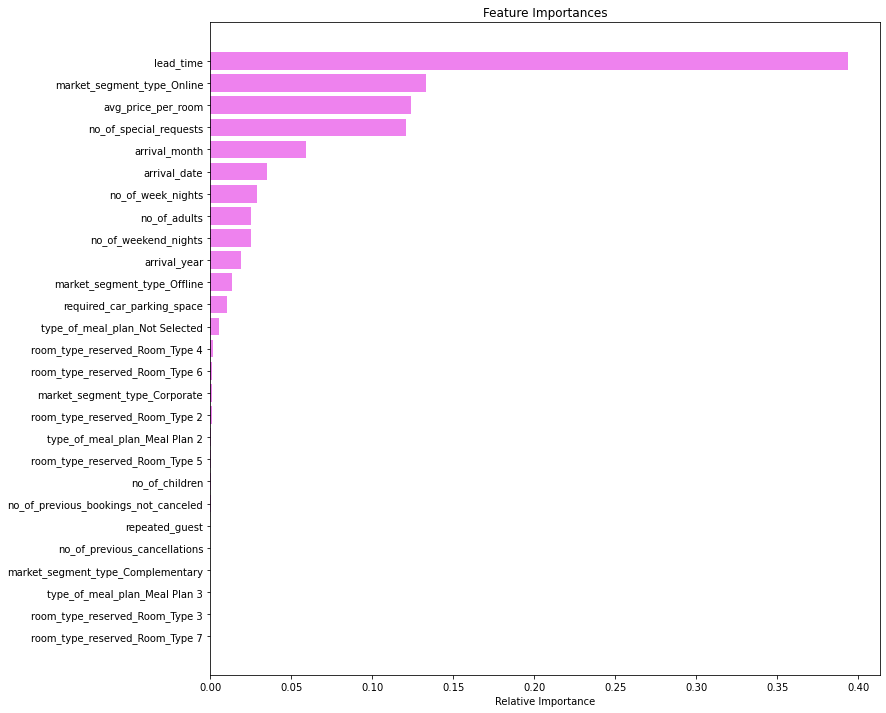

<IPython.core.display.Javascript object>

In [138]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

In [139]:
# training performance comparison

models_train_comp_df = pd.concat(
    [DTree_train_perf.T, DTree_train_preprun_perf.T, DTree_train_postprun_perf.T,],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.84448,0.89993
Recall,0.98661,0.70393,0.90314
Precision,0.99578,0.79986,0.81355
F1,0.99117,0.74884,0.85601


<IPython.core.display.Javascript object>

In [140]:
# testing performance comparison

## Complete the code to compare performance of test set
models_test_comp_df = pd.concat(
    [DTree_test_perf.T, DTree_test_preprun_perf.T, DTree_test_postprun_perf.T,], axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87108,0.84324,0.86879
Recall,0.81034,0.69705,0.85576
Precision,0.79521,0.79347,0.76614
F1,0.80270,0.74214,0.80848


<IPython.core.display.Javascript object>

#### Observation:
- After prunning, the decision tree model eliminated overfitting, both training and testing perform similarly.
- The decision tree with cost complexity pruning is the best model, the model is very robust and complex.
- Our objective is to achieve the highest F1 score, and as such, the Post-pruning decision tree model is the top-performing model, boasting the highest F1 score at 80%. Additionally, this model demonstrates the highest recall, signifying a 85% accuracy in predicting cancellations.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

### Summary

##### Market segments:*
- Online. (~64%)
- Offline. (~29%)
- Corporate. (~5.6%)

##### Special Requests:
- Guest without special request. (~54.5%)
- Guest with 1 special request. (~31.4%) 
- Guest with 2 special requests. (~12%)
- Guest with 3 or more special requests.(~2%)

##### Number of guests:
- Most of the guest come as couple of two.(~72%)
- Single guests (~21%)
- Guest with no kid (~92%)
- Guest with 1 kid (~4.5%)
- Guest with 2 kids.(~3%)

##### Average price per room:
- ~110 dollars (May - September)
- Guests seems to cancel when the average price per room is high (> 110)

##### Cancellation Rate:
- 32.8% of the bookings are canceled.
    * Jan:    2% canceled
    * Feb:    25% canceled
    * Mar:    30% canceled
    * Apr:    36% canceled
    * May:    36% canceled
    * Jun:    40% canceled
    * Jul:    45% canceled
    * Aug:    39% canceled
    * Sept:   33% canceled
    * Oct:    35% canceled
    * Nov:    30% canceled
    * Dec:    13% canceled
- Online market segment.(36% cancellation)
- Offline and Aviation market segment. (30% cancellation)
- Corporate market segment. (10% cancellation)
- Repeated guests are rarely canceled their bookings
- Non-repeated guests. (34% cancellation)
- Guests with 3 or more special requests tends to keep their bookings. 
- The more customization that the guest requested, the less the cancellation rate will be. 
- Guests are more likely to cancel their booking when the lead time is high. On average, guests tend to cancel their bookings 139 days before the scheduled booking date.



##### What profitable policies for cancellations and refunds can the hotel adopt?
- Offer more lenient cancellation policies as a perk to repeated and new guests of your loyalty program. This can incentivize repeat business and guest retention.
- Charge a cancellation fee for bookings that are canceled within a certain timeframe. Ensure that the fee is reasonable and clearly communicated to guests during the booking process.
- Offer different booking options, such as non-refundable, partially refundable, and fully refundable rates. Guests willing to pay more can choose fully refundable rates, while those on a budget can opt for non-refundable rates.

##### What other recommedations would you suggest to the hotel?
- The hotel should encourage guest to customize their bookings to enhance brand loyalty that would decrease cancellation rate.
- The hotel should incentivize for bookings within 30 days of lead time.
- According to the logistic regression model, the hotel can offer free parking, and more special requests to decrease the odd of cancellation.
- The hotel can offer incentives in the Offline market segment to increase guest rentention.
- According to the decision tree model, lead_time, marke_segment_type_Online, avg_price_per room are important features that would impact the cancellation rate. 
- The hotel is recommended to reduce the booking lead time and offer incentive for the online booking price , keeping it in a range that acceptable for guest to retain the booking status. 